Importing packages

In [1]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.preprocessing import StandardScaler

In [2]:
##importung the dataset

data = pd.read_excel(r"C:\Users\rande\Downloads\Concrete_Data.xls")

In [3]:
data

,Cement,BFSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Ccstrength
0,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790
1,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.620648
2,475.0,0.0,0.0,228.0,0.0,932.0,594.0,7,38.603761
3,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270,42.131120
4,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90,42.229026
...,...,...,...,...,...,...,...,...,...
1025,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.198150
1026,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.500999
1027,266.0,114.0,0.0,228.0,0.0,932.0,NaN,270,51.732763
1028,332.5,142.5,0.0,228.0,0.0,932.0,NaN,270,40.269535


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1022 non-null   float64
 1   BFSlag            1028 non-null   float64
 2   FlyAsh            1029 non-null   float64
 3   Water             1004 non-null   float64
 4   Superplasticizer  1022 non-null   float64
 5   CoarseAggregate   1013 non-null   float64
 6   FineAggregate     1017 non-null   float64
 7   Age               1029 non-null   object 
 8   Ccstrength        1028 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.5+ KB


In [5]:
data.describe()

,Cement,BFSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Ccstrength
count,1022.000000,1028.000000,1029.000000,1004.000000,1022.000000,1013.000000,1017.000000,1028.000000
mean,281.191585,73.660360,54.163703,181.559163,6.198586,972.764511,773.837611,35.858030
std,104.911709,86.194361,64.023167,21.629519,5.994885,78.311115,80.418091,16.695688
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,730.000000,23.742796
50%,272.700000,22.000000,0.000000,185.700000,6.435000,967.400000,780.090000,34.522063
75%,353.750000,142.800000,118.270000,192.940000,10.160000,1030.000000,825.000000,46.208682
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,82.599225


In [6]:
data.isnull().sum()

Cement               8
BFSlag               2
FlyAsh               1
Water               26
Superplasticizer     8
CoarseAggregate     17
FineAggregate       13
Age                  1
Ccstrength           2
dtype: int64

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1030, dtype: bool

In [8]:
#1 year is replaced with 365 days in age

data['Age']=data.Age.replace("1 year",365)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1022 non-null   float64
 1   BFSlag            1028 non-null   float64
 2   FlyAsh            1029 non-null   float64
 3   Water             1004 non-null   float64
 4   Superplasticizer  1022 non-null   float64
 5   CoarseAggregate   1013 non-null   float64
 6   FineAggregate     1017 non-null   float64
 7   Age               1029 non-null   float64
 8   Ccstrength        1028 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


Replacing Na values with mean value

In [10]:
data['Cement'].fillna(int(data['Cement'].mean()), inplace=True)
data['BFSlag'].fillna(int(data['BFSlag'].mean()), inplace=True)
data['FlyAsh'].fillna(int(data['FlyAsh'].mean()), inplace=True)
data['Water'].fillna(int(data['Water'].mean()), inplace=True)
data['Superplasticizer'].fillna(int(data['Superplasticizer'].mean()), inplace=True)
data['CoarseAggregate'].fillna(int(data['CoarseAggregate'].mean()), inplace=True)
data['FineAggregate'].fillna(int(data['FineAggregate'].mean()), inplace=True)
data['Ccstrength'].fillna(int(data['Ccstrength'].mean()), inplace=True)
data['Age'].fillna(int(data['Age'].mean()), inplace=True)

In [11]:
data.isnull().sum()

Cement              0
BFSlag              0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
Ccstrength          0
dtype: int64

In [12]:
#Removing duplicates

data=data.drop_duplicates()

In [13]:
data

,Cement,BFSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Ccstrength
0,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.289790
1,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180.0,42.620648
2,475.0,0.0,0.0,228.0,0.0,932.0,594.0,7.0,38.603761
3,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270.0,42.131120
4,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90.0,42.229026
...,...,...,...,...,...,...,...,...,...
1025,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56.0,60.198150
1026,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91.0,62.500999
1027,266.0,114.0,0.0,228.0,0.0,932.0,773.0,270.0,51.732763
1028,332.5,142.5,0.0,228.0,0.0,932.0,773.0,270.0,40.269535


In [14]:
data.columns

Index(['Cement', 'BFSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'Ccstrength'],
      dtype='object')

<AxesSubplot:ylabel='Cement'>

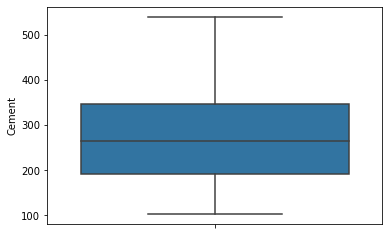

In [15]:
sns.boxplot(y=data['Cement'])

<AxesSubplot:ylabel='BFSlag'>

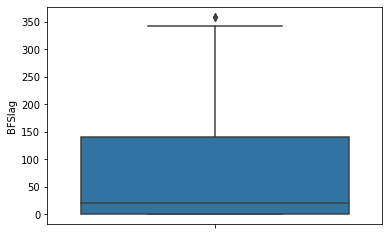

In [16]:
sns.boxplot(y=data['BFSlag'])

In [17]:
sum(data['BFSlag']>300)

10

In [18]:
data['BFSlag']=np.where(data['BFSlag']>300,data['BFSlag'].median(),data['BFSlag'])

C:\Users\rande\AppData\Local\Temp\ipykernel_12208\1460577082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BFSlag']=np.where(data['BFSlag']>300,data['BFSlag'].median(),data['BFSlag'])


<AxesSubplot:ylabel='BFSlag'>

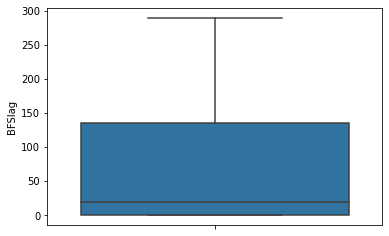

In [19]:
sns.boxplot(y=data['BFSlag'])

<AxesSubplot:ylabel='FlyAsh'>

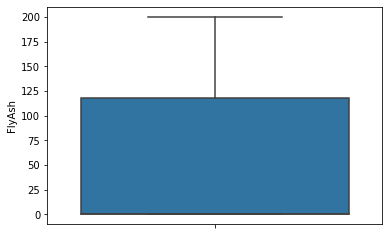

In [20]:
sns.boxplot(y=data['FlyAsh'])

<AxesSubplot:ylabel='Water'>

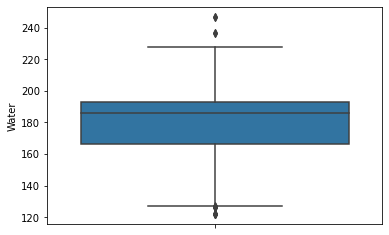

In [21]:
sns.boxplot(y=data['Water'])

In [22]:
sum(data['Water']>200)

158

In [23]:
sum(data['Water']<140)

17

In [24]:
data['Water']=np.where(data['Water']>220,data['Water'].median(),data['Water'])
data['Water']=np.where(data['Water']<140,data['Water'].median(),data['Water'])

C:\Users\rande\AppData\Local\Temp\ipykernel_12208\551022555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Water']=np.where(data['Water']>220,data['Water'].median(),data['Water'])
C:\Users\rande\AppData\Local\Temp\ipykernel_12208\551022555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Water']=np.where(data['Water']<140,data['Water'].median(),data['Water'])


<AxesSubplot:ylabel='Water'>

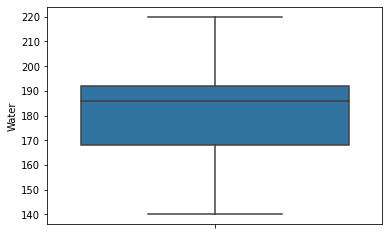

In [25]:
sns.boxplot(y=data['Water'])

<AxesSubplot:ylabel='Superplasticizer'>

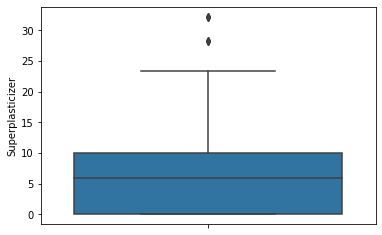

In [26]:
sns.boxplot(y=data['Superplasticizer'])

In [27]:
sum(data['Superplasticizer']>20)

23

In [28]:
data['Superplasticizer']=np.where(data['Superplasticizer']>25,data['Superplasticizer'].median(),data['Superplasticizer'])

C:\Users\rande\AppData\Local\Temp\ipykernel_12208\3606751683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Superplasticizer']=np.where(data['Superplasticizer']>25,data['Superplasticizer'].median(),data['Superplasticizer'])


<AxesSubplot:ylabel='Superplasticizer'>

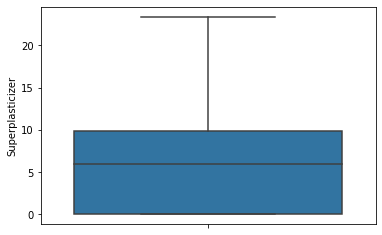

In [29]:
sns.boxplot(y=data['Superplasticizer'])

<AxesSubplot:ylabel='CoarseAggregate'>

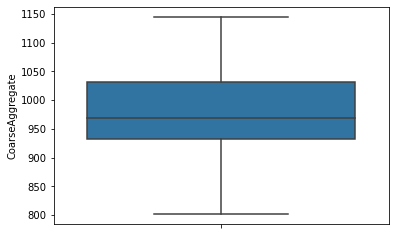

In [30]:
sns.boxplot(y=data['CoarseAggregate'])

<AxesSubplot:ylabel='FineAggregate'>

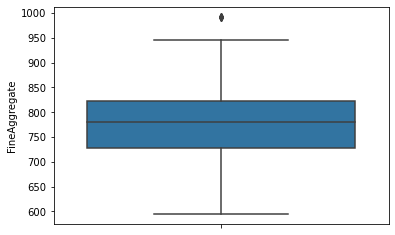

In [31]:
sns.boxplot(y=data['FineAggregate'])

In [32]:
sum(data['FineAggregate']<650)

85

In [33]:
sum(data['FineAggregate']>950)

5

In [34]:
data['FineAggregate']=np.where(data['FineAggregate']>950,data['FineAggregate'].median(),data['FineAggregate'])
data['FineAggregate']=np.where(data['FineAggregate']<650,data['FineAggregate'].median(),data['FineAggregate'])

C:\Users\rande\AppData\Local\Temp\ipykernel_12208\1842709824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FineAggregate']=np.where(data['FineAggregate']>950,data['FineAggregate'].median(),data['FineAggregate'])
C:\Users\rande\AppData\Local\Temp\ipykernel_12208\1842709824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FineAggregate']=np.where(data['FineAggregate']<650,data['FineAggregate'].median(),data['FineAggregate'])


<AxesSubplot:ylabel='FineAggregate'>

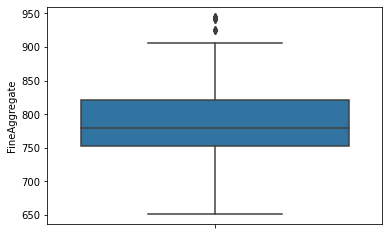

In [35]:
sns.boxplot(y=data['FineAggregate'])

In [36]:
sum(data['FineAggregate']>950)

0

<AxesSubplot:ylabel='Age'>

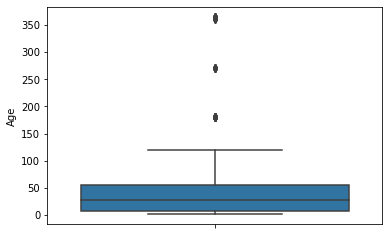

In [37]:
sns.boxplot(y=data['Age'])

In [38]:
sum(data['Age']>150)

59

In [39]:
data['Age']=np.where(data['Age']>150,data['Age'].median(),data['Age'])

C:\Users\rande\AppData\Local\Temp\ipykernel_12208\2827091679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age']=np.where(data['Age']>150,data['Age'].median(),data['Age'])


<AxesSubplot:ylabel='Age'>

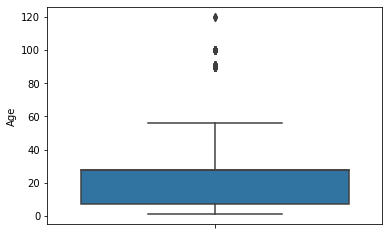

In [40]:
sns.boxplot(y=data['Age'])

In [41]:
sum(data['Age']>80)

126

In [42]:
data['Age']=np.where(data['Age']>80,data['Age'].median(),data['Age'])

C:\Users\rande\AppData\Local\Temp\ipykernel_12208\3410458464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age']=np.where(data['Age']>80,data['Age'].median(),data['Age'])


<AxesSubplot:ylabel='Age'>

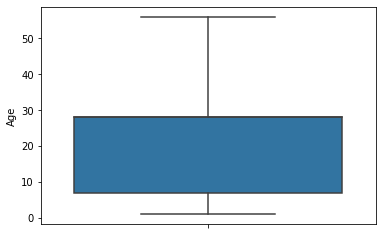

In [43]:
sns.boxplot(y=data['Age'])

<AxesSubplot:ylabel='Ccstrength'>

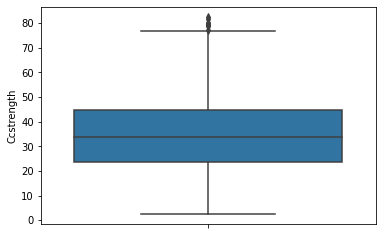

In [44]:
sns.boxplot(y=data['Ccstrength'])

In [45]:
sum(data['Ccstrength']>70)

27

In [46]:
data['Ccstrength']=np.where(data['Ccstrength']>75,data['Ccstrength'].median(),data['Ccstrength'])

C:\Users\rande\AppData\Local\Temp\ipykernel_12208\1993179097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ccstrength']=np.where(data['Ccstrength']>75,data['Ccstrength'].median(),data['Ccstrength'])


<AxesSubplot:ylabel='Ccstrength'>

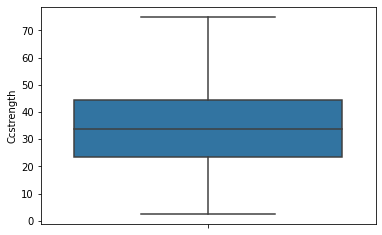

In [47]:
sns.boxplot(y=data['Ccstrength'])

# EDA

In [48]:
data.columns

Index(['Cement', 'BFSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'Ccstrength'],
      dtype='object')

<AxesSubplot:xlabel='Ccstrength', ylabel='Cement'>

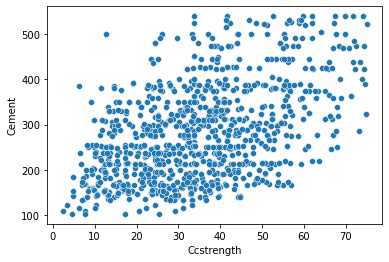

In [49]:
sns.scatterplot(data = data,x= 'Ccstrength' ,y='Cement')

<AxesSubplot:xlabel='Ccstrength', ylabel='BFSlag'>

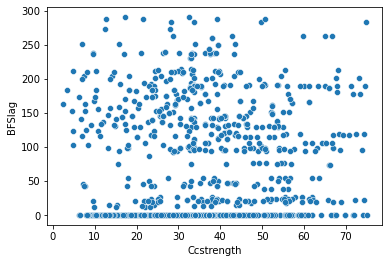

In [50]:
sns.scatterplot(data = data,x= 'Ccstrength' ,y='BFSlag')

<AxesSubplot:xlabel='Ccstrength', ylabel='FlyAsh'>

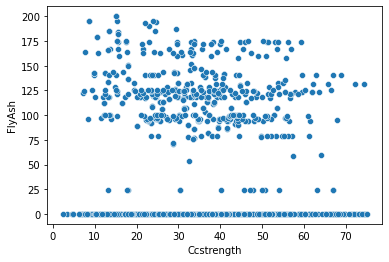

In [51]:
sns.scatterplot(data = data,x= 'Ccstrength' ,y='FlyAsh')

<AxesSubplot:xlabel='Ccstrength', ylabel='Water'>

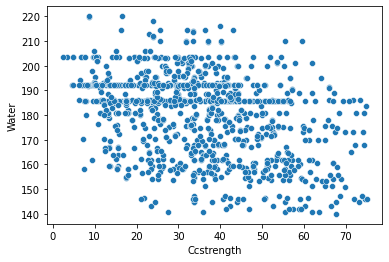

In [52]:
sns.scatterplot(data = data,x= 'Ccstrength' ,y='Water')

<AxesSubplot:xlabel='Ccstrength', ylabel='Superplasticizer'>

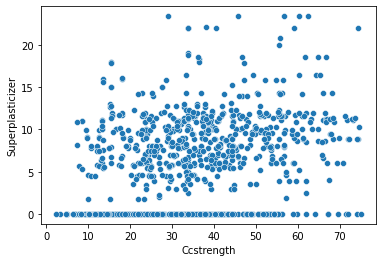

In [53]:
sns.scatterplot(data = data,x= 'Ccstrength' ,y='Superplasticizer')

<AxesSubplot:xlabel='Ccstrength', ylabel='CoarseAggregate'>

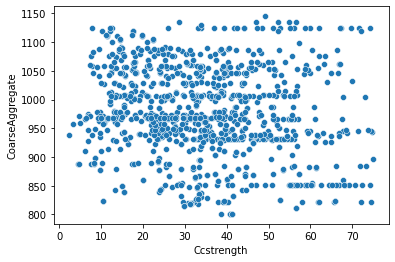

In [54]:
sns.scatterplot(data = data,x= 'Ccstrength' ,y='CoarseAggregate')

<AxesSubplot:xlabel='Ccstrength', ylabel='FineAggregate'>

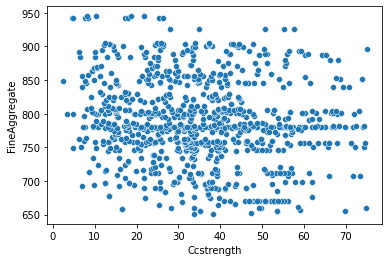

In [55]:
sns.scatterplot(data = data,x= 'Ccstrength' ,y='FineAggregate')

<AxesSubplot:xlabel='Ccstrength', ylabel='Age'>

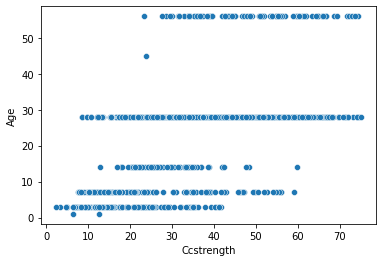

In [56]:
sns.scatterplot(data = data,x= 'Ccstrength' ,y='Age')

<AxesSubplot:>

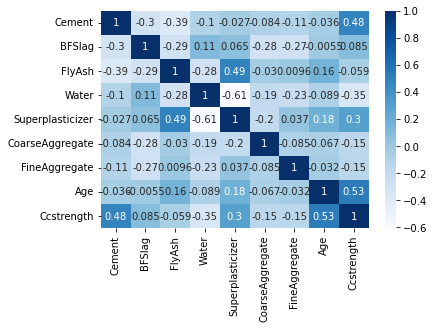

In [100]:
#calculating Pearson correlations

corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

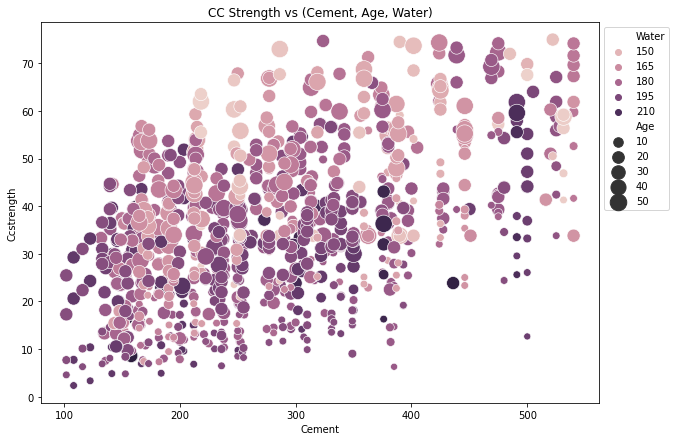

In [57]:
fig,ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y='Ccstrength',x='Cement',hue="Water", size="Age",data=data,ax=ax,sizes= (50,300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# Observations from CcStrength vs (Cement, Age, Water)
1) Compressive strength increases with amount of cement
2) Compressive strength increases with age
3) Cement with low age requires more cement for higher strength
4) The older the cement is the more water it requires
5) Concrete strength increases when less water is used in preparing it

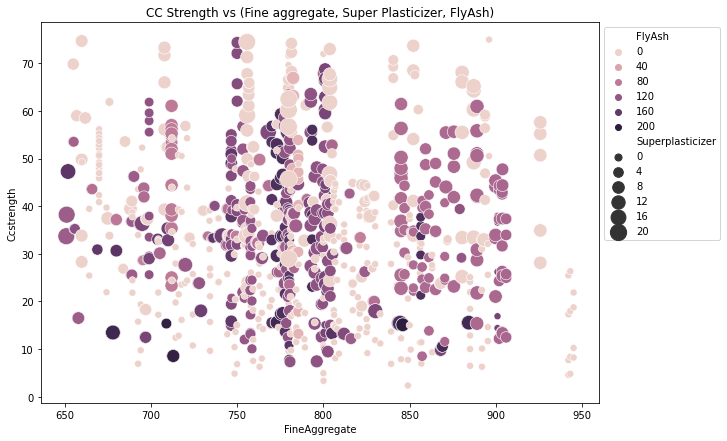

In [58]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="Ccstrength", x="FineAggregate", hue="FlyAsh", size="Superplasticizer", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()


# Observations from CcStrength vs (Fine aggregate, Super Plasticizer, FlyAsh)
1 As Flyash increases the strength decreases
2 Strength increases with Super plasticizer

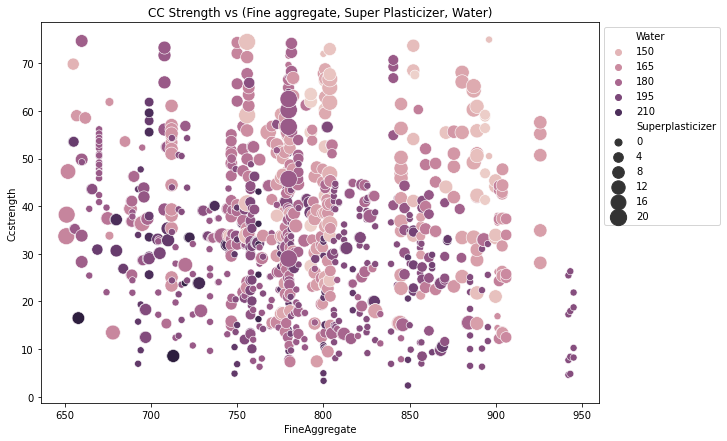

In [59]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="Ccstrength", x="FineAggregate", hue="Water", size="Superplasticizer", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# Observations from CcStrength vs (Fine aggregate, Super Plasticizer, Water)
1 Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
2 More Fine aggregate is used when less water, more Super plasticizer is used.

In [60]:
# Omitting missing values
data1 = data.dropna(axis = 0)

In [61]:
X=data[['Cement','Water','Age']]
Y=data["Ccstrength"]

In [62]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 704
Testing Data Count: 302


# Model Building

Model1

Model - Ccstrength ~ Cement + Water + Age

In [63]:
# Model building
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ccstrength   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     358.3
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          6.16e-141
Time:                        20:02:55   Log-Likelihood:                -2595.3
No. Observations:                 704   AIC:                             5199.
Df Residuals:                     700   BIC:                             5217.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3087      4.384      9.878      0.000      34.701      51.916
Cement         0.0703      0.004     19.581      0.000       0.063       0.077
Water         -0.2332      0.022    -10.387      0.000      -0.277      -0.189
Age            0.5917      0.026     23.027      0.000       0.541       0.642
==============================================================================
Omnibus:                       16.629   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.239
Skew:                           0.381   Prob(JB):                     0.000181
Kurtosis:                       3.090   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
def rmse(test_y,predicted_y):
  t1 = np.exp(test_y)
  t2 = np.exp(predicted_y)
  rmse_test = np.sqrt(mean_squared_error(t1, t2))
  
  base_pred = np.repeat(np.mean(t1), len(t1)) # For calculating base RMSE
  rmse_base = np.sqrt(mean_squared_error(t1, base_pred))
  values = {'RMSE-test from model': rmse_test,'Base RMSE': rmse_base}
  return values

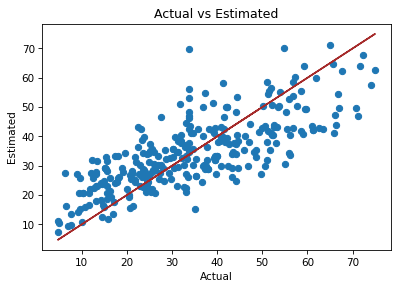

In [88]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="brown")
plt.xlabel("Actual")
plt.ylabel("Estimated")
plt.title("Actual vs Estimated")
plt.show()

In [93]:
print("Root Mean Squared Error (RMSE) : ",rmse(y_test, y_preds))

Root Mean Squared Error (RMSE) :  {'RMSE-test from model': 2.3247634619965983e+31, 'Base RMSE': 2.3163579552725635e+31}


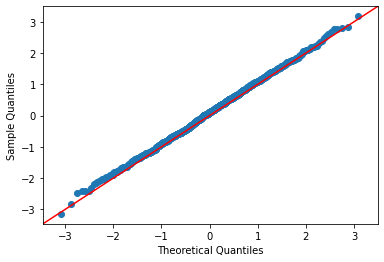

In [68]:
# Random data points generated
data_points = np.random.normal(0, 1, 1000)    
  
sm.qqplot(data_points, line ='45')
py.show()

Model2 - Ccstrength ~ Cement + BFSlag + CoarseAggregate + Age + water

In [70]:
X1=data[['Cement','Water','BFSlag','CoarseAggregate','Age']]
Y=data['Ccstrength']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size = 0.3, random_state = 3)

X1_train = sm.add_constant(X1_train)

results1 = sm.OLS(y1_train, X1_train).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ccstrength   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     302.3
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          6.27e-172
Time:                        20:12:24   Log-Likelihood:                -2517.2
No. Observations:                 704   AIC:                             5046.
Df Residuals:                     698   BIC:                             5074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              48.6082      6.667      7.291      0.000      35.518      61.698
Cement              0.0810      0.003     23.730      0.000       0.074       0.088
Water              -0.2577      0.020    -12.604      0.000      -0.298      -0.218
BFSlag              0.0529      0.004     11.773      0.000       0.044       0.062
CoarseAggregate    -0.0076      0.005     -1.661      0.097      -0.016       0.001
Age                 0.5909      0.023     25.541      0.000       0.545       0.636
==============================================================================
Omnibus:                        9.045   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.897
Skew:                           0.204   Prob(JB):                      0.00709
Kurtosis:                       3.413   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

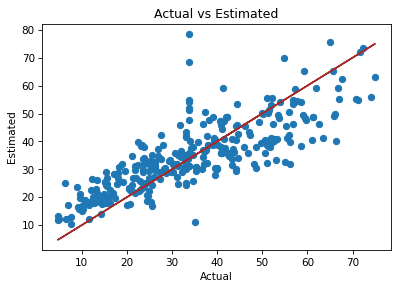

In [86]:
X1_test = sm.add_constant(X1_test)
y1_preds = results1.predict(X1_test)

plt.figure(dpi = 75)
plt.scatter(y1_test, y1_preds)
plt.plot(y1_test, y1_test, color="brown")
plt.xlabel("Actual")
plt.ylabel("Estimated")
plt.title("Actual vs Estimated")
plt.show()

In [94]:
print("Root Mean Squared Error (RMSE) : ",rmse(y1_test, y1_preds))

Root Mean Squared Error (RMSE) :  {'RMSE-test from model': 7.435130036685501e+32, 'Base RMSE': 2.3163579552725635e+31}


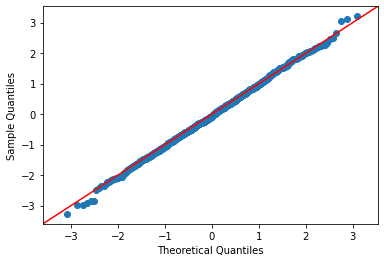

In [72]:
# Random data points generated
data_points = np.random.normal(0, 1, 1000)    
  
sm.qqplot(data_points, line ='45')
py.show()

Model 3 
 - Ccstrength ~ Cement + BFSlag + CoarseAggregate + Age + water + Superplasticizer

In [105]:
X2=data[['Cement','Water','BFSlag','CoarseAggregate','Age','Superplasticizer']]
Y=data['Ccstrength']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.3, random_state = 3)

X2_train = sm.add_constant(X2_train)

results1 = sm.OLS(y2_train, X2_train).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ccstrength   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     253.4
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          2.06e-171
Time:                        23:07:07   Log-Likelihood:                -2515.5
No. Observations:                 704   AIC:                             5045.
Df Residuals:                     697   BIC:                             5077.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               37.6518      8.894      4.233      0.000      20.189      55.115
Cement               0.0821      0.003     23.743      0.000       0.075       0.089
Water               -0.2232      0.028     -8.084      0.000      -0.277      -0.169
BFSlag               0.0528      0.004     11.748      0.000       0.044       0.062
CoarseAggregate     -0.0038      0.005     -0.773      0.440      -0.014       0.006
Age                  0.5854      0.023     25.136      0.000       0.540       0.631
Superplasticizer     0.1638      0.088      1.857      0.064      -0.009       0.337
==============================================================================
Omnibus:                        9.722   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.064
Skew:                           0.201   Prob(JB):                      0.00396
Kurtosis:                       3.464   Cond. No.                     2.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

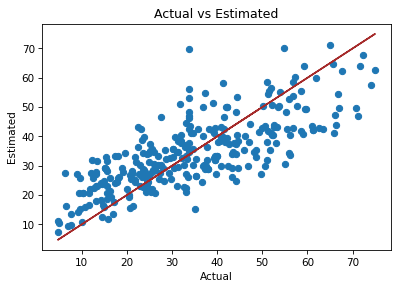

In [104]:
X2_test = sm.add_constant(X2_test)

y2_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="brown")
plt.xlabel("Actual")
plt.ylabel("Estimated")
plt.title("Actual vs Estimated")
plt.show()

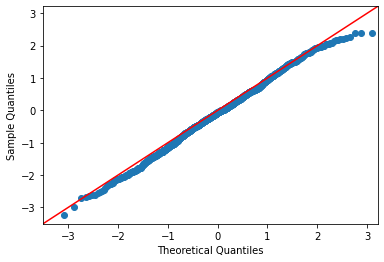

In [103]:
# Random data points generated
data_points = np.random.normal(0, 1, 1000)    
  
sm.qqplot(data_points, line ='45')
py.show()

In [106]:
print("Root Mean Squared Error (RMSE) : ",rmse(y2_test, y2_preds))

Root Mean Squared Error (RMSE) :  {'RMSE-test from model': 2.3247634619965983e+31, 'Base RMSE': 2.3163579552725635e+31}


Full model  Ccstrength ~ Cement + BFSlag + FlyAsh + Water + Superplasticizer + CoarseAggregate + FineAggregate + Age

In [73]:
X3=data[['Cement','BFSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age']]
Y = data['Ccstrength']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y, test_size = 0.3, random_state = 3)

X3_train = sm.add_constant(X3_train)

results3 = sm.OLS(y3_train, X3_train).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ccstrength   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          6.94e-175
Time:                        20:12:33   Log-Likelihood:                -2501.7
No. Observations:                 704   AIC:                             5021.
Df Residuals:                     695   BIC:                             5062.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               56.0195     14.607      3.835      0.000      27.341      84.698
Cement               0.0885      0.005     17.878      0.000       0.079       0.098
BFSlag               0.0596      0.006      9.195      0.000       0.047       0.072
FlyAsh               0.0290      0.009      3.297      0.001       0.012       0.046
Water               -0.2570      0.030     -8.501      0.000      -0.316      -0.198
Superplasticizer    -0.0655      0.099     -0.663      0.508      -0.259       0.128
CoarseAggregate     -0.0059      0.006     -1.076      0.282      -0.017       0.005
FineAggregate       -0.0159      0.007     -2.248      0.025      -0.030      -0.002
Age                  0.5754      0.023     25.075      0.000       0.530       0.621
==============================================================================
Omnibus:                       10.131   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.159
Skew:                           0.188   Prob(JB):                      0.00229
Kurtosis:                       3.523   Cond. No.                     5.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

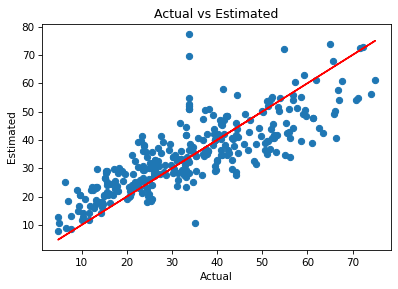

In [83]:
X3_test = sm.add_constant(X3_test)
y3_preds = results3.predict(X3_test)

plt.figure(dpi = 75)
plt.scatter(y3_test, y3_preds)
plt.plot(y3_test, y3_test, color="red")
plt.xlabel("Actual")
plt.ylabel("Estimated")
plt.title("Actual vs Estimated")
plt.show()

In [95]:
print("Root Mean Squared Error (RMSE) : ",rmse(y3_test, y3_preds))

Root Mean Squared Error (RMSE) :  {'RMSE-test from model': 2.4718661670268956e+32, 'Base RMSE': 2.3163579552725635e+31}


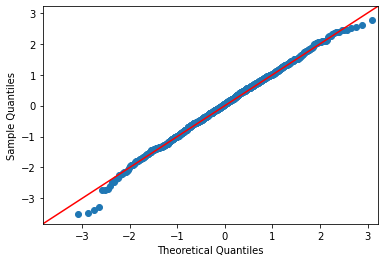

In [80]:
# Random data points generated
data_points = np.random.normal(0, 1, 1000)    
  
sm.qqplot(data_points, line ='45')
py.show()